## Script for visualization of figures

In [156]:
import numpy as np
import matplotlib.pyplot as plt
from dmipy.core.acquisition_scheme import acquisition_scheme_from_schemefile
from scipy import ndimage
import nibabel as nib

In [157]:
scheme = acquisition_scheme_from_schemefile("/Users/theavage/Documents/Master/Master-project/data/GS55.scheme")

In [158]:
signal = np.load("/Users/theavage/Documents/Master/Master-project/data/simulated_9180.npy")


In [246]:
data = nib.load("/Users/theavage/Documents/Master/Data/GS35/P35_dwi.nii.gz").get_fdata()
img_mask = nib.load("/Users/theavage/Documents/Master/Master-project/data/P35_dwi_mask.nii.gz").get_fdata()

pred_radi = np.load("results/radii_9180_20_noise.npy")[:256*256*252].reshape([256,256,252])
pred_f_sphere = np.load("results/f_sphere_9180_20_noise.npy")[:256*256*252].reshape([256,256,252])
pred_f_ball = np.load("results/f_ball_9180_20_noise.npy")[:256*256*252].reshape([256,256,252])
pred_f_stick = np.load("results/f_stick_9180_20_noise.npy")[:256*256*252].reshape([256,256,252])


In [247]:
mask = img_mask == 0

pred_radi[mask] = 0
pred_f_sphere[mask] = 0
pred_f_ball[mask] = 0
pred_f_stick[mask] = 0

In [248]:
scheme = acquisition_scheme_from_schemefile("/Users/theavage/Documents/Master/Data/GS35/GS35.scheme")

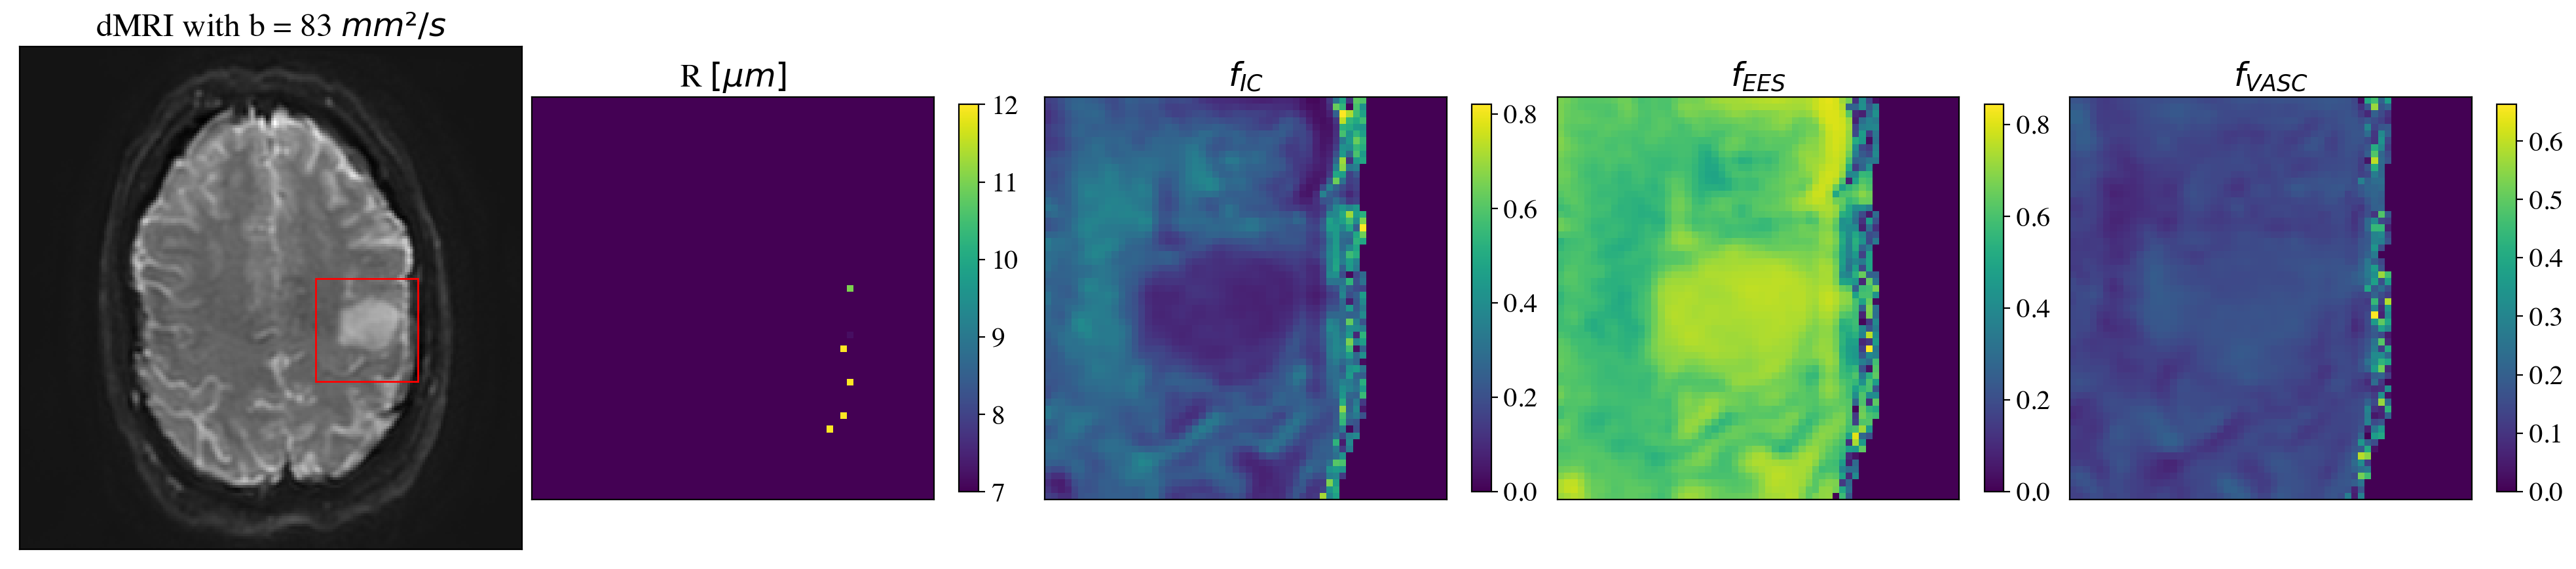

In [276]:
import matplotlib.patches as patches

image = ndimage.rotate(data[30:226,30:226,175,4], 90)
images = [image,pred_radi[140:200,90:150,175],pred_f_sphere[140:200,90:150,175],pred_f_ball[140:200,90:150,175],pred_f_stick[140:200,90:150,175]]
names = ["dMRI with b = 83 $mm²/s$","R $[\mu m]$",'$f_{IC}$','$f_{EES}$','$f_{VASC}$']  

plt.rcParams["figure.dpi"] = 200
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'times'


fig = plt.figure(figsize=(20,5))

ax1 = plt.subplot2grid(shape=(1, 5), loc=(0, 0))
ax2 = plt.subplot2grid(shape=(1, 5), loc=(0, 1))
ax3 = plt.subplot2grid(shape=(1, 5), loc=(0, 2))
ax4 = plt.subplot2grid(shape=(1, 5), loc=(0, 3))
ax5 = plt.subplot2grid((1, 5), (0, 4))

axes = [ax1,ax2,ax3,ax4,ax5]

for i in range(len(axes)):

    if i == 0:
        axes[i].imshow(images[i],cmap='gray')
        rect = patches.Rectangle((115,90),40,40,linewidth=1,edgecolor='r',facecolor='none')
        axes[i].add_patch(rect)
        
    else:
        image = axes[i].imshow(ndimage.rotate(images[i], 90),cmap='viridis')
        mappable = image
        
        if i == 1:
            mappable.set_clim(7,12)
        #else:
           # mappable.set_clim(np.min(images[i][np.nonzero(images[i])]), images[i].max())
    
        fig.colorbar(mappable, ax=axes[i], shrink=0.7)


    axes[i].set_title(names[i])

    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.4)

plt.tight_layout()
plt.show()



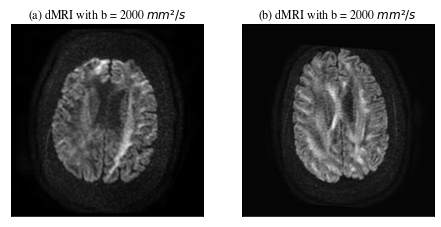

In [75]:
fig = plt.figure(figsize=(20,20))
plt.rcParams['font.family'] = 'times'

ax1 = plt.subplot2grid(shape=(1, 5), loc=(0, 0))
ax2 = plt.subplot2grid(shape=(1, 5), loc=(0, 1))

ax1.imshow(ndimage.rotate(data[:,:,14,149], 90),cmap='gray')
ax1.set_title('(a) '+names[0])
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)

ax2.imshow(ndimage.rotate(data2[:,:,159,15], 90),cmap='gray')
ax2.set_title('(b) '+names[0])
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)



In [5]:
import torch

def get_scheme_values(path_to_acqscheme, no_zero_values=True):
    
    scheme = acquisition_scheme_from_schemefile(path_to_acqscheme)

    b_values = scheme.bvalues
    gradient_strength = scheme.gradient_strengths
    gradient_directions = scheme.gradient_directions
    delta = scheme.delta
    Delta = scheme.Delta

    if no_zero_values:
        zero_idx = np.where(gradient_strength==0)
        b_values = torch.FloatTensor(np.delete(b_values,zero_idx))
        gradient_strength = torch.FloatTensor(np.delete(gradient_strength,zero_idx))
        gradient_directions = torch.FloatTensor(np.delete(gradient_directions,zero_idx,0))
        delta = torch.FloatTensor(np.delete(delta,zero_idx))
        Delta = torch.FloatTensor(np.delete(Delta,zero_idx))
    
    else:
        b_values = torch.FloatTensor(b_values)
        gradient_strength = torch.FloatTensor(gradient_strength)
        gradient_directions = torch.FloatTensor(gradient_directions)
        delta = torch.FloatTensor(delta)
        Delta = torch.FloatTensor(Delta)
    return b_values, gradient_strength, gradient_directions, delta, Delta

In [ ]:
img = ''

pred_radi = np.load("results/radii_9180"+img+".npy")
pred_f_sphere = np.load("results/f_sphere_9180"+img+".npy")
pred_f_ball = np.load("results/f_ball_9180"+img+".npy")
pred_f_stick = np.load("results/f_stick_9180"+img+".npy")


In [ ]:
img = ''

pred_radi = np.load("/Users/theavage/Documents/Master/Master-project/DMIPY/results/simulated_9180/diameter.npy")*1e6/2
pred_f_sphere = np.load("/Users/theavage/Documents/Master/Master-project/DMIPY/results/simulated_9180/partial_volume_0.npy")
pred_f_ball = np.load("/Users/theavage/Documents/Master/Master-project/DMIPY/results/simulated_9180/partial_volume_1.npy")
pred_f_stick = np.load("/Users/theavage/Documents/Master/Master-project/DMIPY/results/simulated_9180/partial_volume_2.npy")


In [ ]:
import statistics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

j = 1

rel = 0.0002

radi_idx = [i for i in range(len(parameter_vector[:,j])) if 0.15 <= parameter_vector[:,j][i] <= 0.25]
pred_8_radi = pred_f_sphere[radi_idx]

radi = pred_8_radi.squeeze()
mse= mean_squared_error(radi,np.full(radi.shape,0.2))
std = statistics.stdev(radi)
mean = statistics.mean(radi)

print("%.3f $\pm$ %.3f & %.4f" %(mean,std,mse))
print("%.1f" % (mse/rel))


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

print("f_sphere")
print("r2_score: " +str(r2_score(parameter_vector[:,1].flatten(),pred_f_sphere.squeeze())))
print(" mean_absoulte_error: " + str(mean_absolute_error(parameter_vector[:,1].flatten(),pred_f_sphere.squeeze())))

print("f_ball")
print("r2_score: " +str(r2_score(parameter_vector[:,2].flatten(),pred_f_ball.squeeze())))
print(" mean_absoulte_error: " + str(mean_absolute_error(parameter_vector[:,2].flatten(),pred_f_ball.squeeze())))

print("f_stick")
print("r2_score: " +str(r2_score(parameter_vector[:,3].flatten(),pred_f_stick.squeeze())))
print(" mean_absoulte_error: " + str(mean_absolute_error(parameter_vector[:,3].flatten(),pred_f_stick.squeeze())))

print("radi:")
print("r2_score: " + str(r2_score(parameter_vector[:,0].flatten()/parameter_vector[:,0].flatten().max(),pred_radi.squeeze()/pred_radi.squeeze().max())))
print(" mean_absoulte_error: " + str(mean_absolute_error(parameter_vector[:,0].flatten(),pred_radi.squeeze())))



In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from numpy import isin
%matplotlib inline

k = 95
plt.rcParams["figure.dpi"] = 150
plt.rcParams['savefig.dpi'] = 150
plt.rcParams['font.size'] = 13
plt.rcParams['font.family'] = "times"


fig, ax = plt.subplots(1,4, figsize=(16,3.5))

names = ['R $[\mu m]$','$f_{ic}$','$f_{EES}$','$f_{VASC}$']

vis =  parameter_vector[:k*k].reshape(k,k,4)
radi = vis[:,:,0]*1e6/2
image = ax[0].imshow(radi,cmap='viridis')
mesh = ax[0].pcolormesh(radi)
mesh.set_clim(2,15)
fig.colorbar(mesh,ax=ax[0],shrink=0.8)
ax[0].set_title(names[0])
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)

for i in [1,2,3]:
    image = ax[i].imshow(vis[:,:,i])
    mappable = image
    mappable.set_clim(0.1, 0.8)
    fig.colorbar(image,ax=ax[i],shrink=0.8)
    ax[i].set_title(names[i])
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)

fig, ax = plt.subplots(1,4, figsize=(16,3.5))

predictions =  [pred_radi,pred_f_sphere,pred_f_ball ,pred_f_stick]

for i in [0,1,2,3]:
    image = ax[i].imshow(predictions[i][:k*k].reshape(k,k))
    mappable = image
    if i == 0:
        mappable.set_clim(2,15)
    else:
        mappable.set_clim(0.1, 0.8)
    fig.colorbar(mappable, ax=ax[i], shrink=0.8)
    ax[i].set_title(names[i])
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)


## Scatter plots
x = np.arange(0,1.1,1/9180)
y = np.arange(0,1.1,1/9180)
x_r = np.arange(1,18,1/9180)
y_r = np.arange(1,18,1/9180)

fig, ax = plt.subplots(1,4, figsize=(24,6))
fig.patch.set_facecolor('white')

plt.rcParams['axes.titlecolor'] = 'black'


for i in range(4):

    if i == 0:
        image = ax[i].scatter(parameter_vector[:,i]*1e6/2,predictions[i],label='Predicted values', marker = 'x', linewidths=0.03)
        ref = ax[i].plot(x_r,y_r, label='GT reference', ls = '--', color = 'gray')
        ax[i].set_xlim(1,16)
        ax[i].set_ylim(1,16)
        ax[i].set_xlabel('GT')
        ax[i].set_ylabel('prediction')
        ax[i].set_title(names[i])
    else:
        image = ax[i].scatter(parameter_vector[:,i],predictions[i],label='Predicted values', marker = 'x', linewidths=0.03)
        ref = ax[i].plot(x,y, label='GT reference',ls = '--', color = 'gray')
        ax[i].set_xlim([parameter_vector[:,i].min()-0.1,parameter_vector[:,i].max()+0.1])
        ax[i].set_ylim([parameter_vector[:,i].min()-0.1,parameter_vector[:,i].max()+0.1])
        ax[i].set_xlabel('GT')
        ax[i].set_ylabel('prediction')
        ax[i].set_title(names[i])

    ax[i].legend()



In [ ]:
# plot simulated diffusion weighted image
import matplotlib.pyplot as plt

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams["figure.dpi"] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 13
plt.rcParams['font.family'] = 'times'

b_id = [2,1400,1488,2000] 
fig, ax = plt.subplots(1,len(b_id), figsize=(20,20))
fig.patch.set_facecolor('white')

plt.rcParams['axes.titlecolor'] = 'black'

for i in range(len(b_id)):
    image = ax[i].imshow(dwi_image[:, :, b_id[i]], cmap='viridis', clim=(0, 1))
    ax[i].set_title('b = ' + str(round(scheme.bvalues[b_id[i]]/1e6)))
    ax[i].set_xticks([])
    ax[i].set_yticks([])

cbar_ax = fig.add_axes([0.87, 0.42, 0.02, 0.17])
fig.subplots_adjust(right=0.85)
fig.colorbar(image,cax = cbar_ax)
#mesh = ax[3].pcolormesh(image)
#mesh.set_clim(0,1)
#fig.colorbar(mesh,ax=ax[3],shrink=0.8)

pred_radi = np.load('results/radii_test.npy').reshape(50,50)
pred_f_sphere = np.load('results/f_sphere_test.npy').reshape(50,50)
pred_f_ball = np.load('results/f_ball_test.npy').reshape(50,50)
pred_f_stick = np.load('results/f_stick_test.npy').reshape(50,50)
pred_radi.shape 

In [ ]:

fig, ax = plt.subplots(1,4, figsize=(20,20))
fig.patch.set_facecolor('white')

pred = [pred_radi,pred_f_sphere,pred_f_ball,pred_f_stick]
names = ['R $[\mu m]$','$f_{ic}$','$f_{EES}$','$f_{VASC}$']


plt.rcParams['axes.titlecolor'] = 'black'

for i in range(4):
    image = ax[i].imshow(pred[i], cmap='viridis')
    mappable = image
    if i == 0:
        mappable.set_clim(2,15)
    else:
        mappable.set_clim(0.1, 0.8)
    fig.colorbar(mappable, ax=ax[i], shrink=0.2)
    ax[i].set_title(names[i])
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)


## GT


fig, ax = plt.subplots(1,4, figsize=(20,20))
fig.patch.set_facecolor('white')

gt = [r_truth*1e6/2,f_sphere_truth,f_ball_truth,f_stick_truth]

plt.rcParams['axes.titlecolor'] = 'black'

for i in range(4):
    image = ax[i].imshow(gt[i], cmap='viridis')
    mappable = image
    if i == 0:
        mappable.set_clim(2,15)
    else:
        mappable.set_clim(0.1, 0.8)
    fig.colorbar(mappable, ax=ax[i], shrink=0.2)
    ax[i].set_title(names[i])
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)


## Scatter plots
x = np.arange(0,1.1,1/9180)
y = np.arange(0,1.1,1/9180)
x_r = np.arange(1,18,1/9180)
y_r = np.arange(1,18,1/9180)

fig, ax = plt.subplots(1,4, figsize=(24,6))
fig.patch.set_facecolor('white')

plt.rcParams['axes.titlecolor'] = 'black'


for i in range(4):
    image = ax[i].scatter(gt[i],pred[i],label='Predicted values', marker = 'x', linewidths=3)
    
    if i == 0:
        ref = ax[i].plot(x_r,y_r, label='GT reference', ls = '--', color = 'gray')
        ax[i].set_xlim(1,16)
        ax[i].set_ylim(1,16)
        ax[i].set_xlabel('GT')
        ax[i].set_ylabel('prediction')
        ax[i].set_title(names[i])
    else:

        ref = ax[i].plot(x,y, label='GT reference',ls = '--', color = 'gray')
        ax[i].set_xlim([pred[i].min()-0.1,pred[i].max()+0.1])
        ax[i].set_ylim([pred[i].min()-0.1,pred[i].max()+0.1])
        ax[i].set_xlabel('GT')
        ax[i].set_ylabel('prediction')
        ax[i].set_title(names[i])

    ax[i].legend()